In [30]:
# import necessary libraries/modules
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random

run_cell = False # used to skip redundant cells when running notebook

In [49]:
# generate sample graph
G = nx.karate_club_graph()

In [32]:
# create function that selects a random edge for use in edge_exchange
def get_random_edge(G):
    '''
    selects one edge at random from graph G and returns its two nodes

    Args:
        G (nx.Graph): the graph to be referenced

    Returns:
        list: a list of the two nodes from selected edge
    '''
    edges = list(G.edges())

    random_edge = random.choice(edges)

    return list(random_edge)

In [ ]:
# translating provided pseudocode function
if run_cell:
    def edge_exchange(G, t):
        '''
        Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
        degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

        Args:
            G (nx.Graph): an undirected graph
            t (int): number of exchanges to be performed.

        Returns:
            nx.Graph: a new, randomized version of input graph G.
        '''
        G_copy = G.copy()  # create a copy of the graph so as to avoid altering it in place

        s = 0  # initialize counter

        while s < t:
            node_a, node_b = get_random_edge(G_copy)
            # define nodes to be referenced
            node_c, node_d = get_random_edge(G_copy)
            if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
                continue  # skip if edges not independent
            if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
                continue  # skip if edges to be created already exist
            G_copy.remove_edge(node_a, node_b)
            G_copy.remove_edge(node_c, node_d)
            G_copy.add_edge(node_a, node_d)
            G_copy.add_edge(node_b, node_c)  # remove and replace edges

            s += 1  # add 1 to counter

        return G_copy

In [ ]:
# 2b
def edge_exchange(G, t, max):
    '''
    Implements 'edge exchange' algorithm to generate a null model of a graph while preserving its initial 
    degree distribution. Performs 't' successful edge exchanges on given graph 'G' to randomize it.

    Args:
        G (nx.Graph): an undirected graph
        t (int): number of exchanges to be performed.
        max (int): maximum number of failed iterations before loop closes

    Returns:
        nx.Graph: a new, randomized version of input graph G.
    '''
    G_copy = G.copy()  # create a copy of the graph so as to avoid altering it in place

    s = 0  # initialize counter for successful swaps
    itercount = 0  # initialize counter for failed iterations

    while s < t and itercount < max:
        node_a, node_b = get_random_edge(G_copy)
        # define nodes to be referenced
        node_c, node_d = get_random_edge(G_copy)
        if node_a == node_c or node_a == node_d or node_b == node_c or node_b == node_d:
            itercount += 1  # add 1 to failure counter
            continue  # skip if edges not independent
        if G_copy.has_edge(node_a, node_d) or G_copy.has_edge(node_b, node_c):
            itercount += 1
            continue  # skip if edges to be created already exist
        G_copy.remove_edge(node_a, node_b)
        G_copy.remove_edge(node_c, node_d)
        G_copy.add_edge(node_a, node_d)
        G_copy.add_edge(node_b, node_c)  # remove and replace edges

        s += 1  # add 1 to success counter

    if itercount == max:  # print error message if max failures reached
        print("Error: Insufficient number of allowable exchanges")
        return None # differentiate between outputs if loop fails

    return G_copy

In [47]:
G = nx.complete_graph(100) # creating a complete graph to test functionality of 2b answer

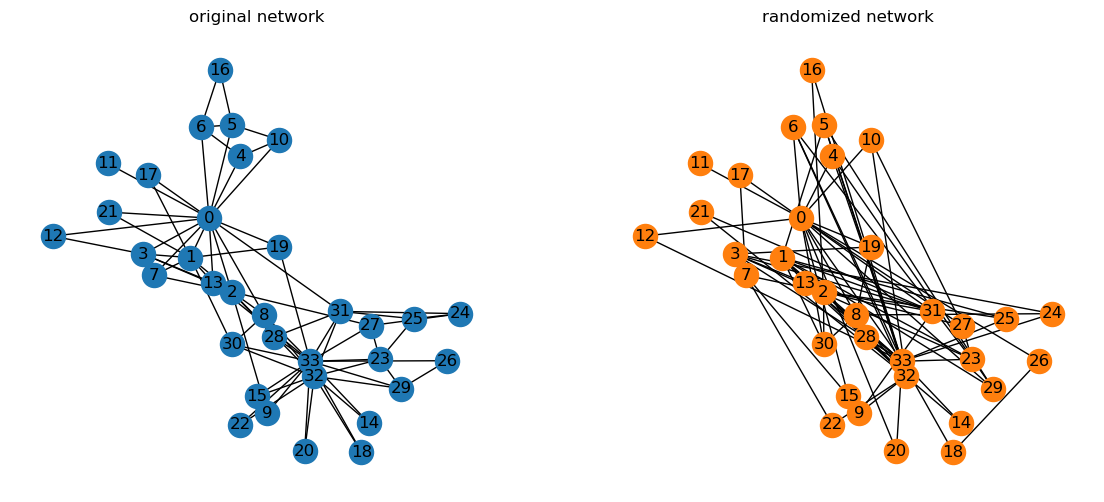

In [50]:
# testing the function

# call function and assign it to a variable
G_null = edge_exchange(G, 100, 1000)

if G_null is not None:

    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

    ax[0].set_title("original network")

    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, ax=ax[0], with_labels=True, node_color='#1f78b4')

    ax[1].set_title("randomized network")

    nx.draw(G_null, pos, ax=ax[1], with_labels=True, node_color='#ff7f0e')

    plt.show()